In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn import metrics
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
import xgboost as xgb 
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


In [2]:
df=pd.read_csv('churnTrain.csv')
df.columns = map(str.lower, df.columns)

In [3]:
df

,state,account_length,area_code,phone_no,international_plan,voice_mail_plan,no_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,no_cs_calls,churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,4144276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,3703271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,3288230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,3646381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [176]:
df.describe()

,account_length,area_code,phone_no,no_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,no_cs_calls
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,2.746626e+05,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,4.229964e+06,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Vamos olhar a correlação e tirar os campos nulos

In [177]:
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True)

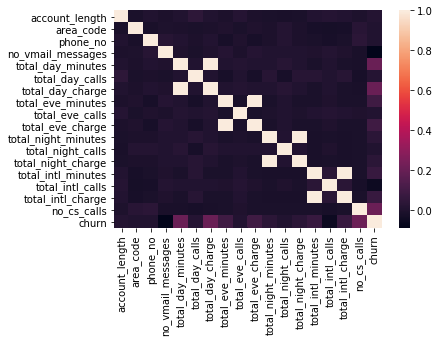

In [178]:
ax = sns.heatmap(df.corr())

## Dividir as features das labels pra limpar elas depois

In [179]:
df_label=df['churn']
df_features=df.drop('churn',axis=1)

In [180]:
df_features_categorical=df_features.select_dtypes(object)
df_features_numerical=df_features.select_dtypes([int,float])




In [181]:
categorical=[]
numerical=[]
label=['churn']
for i in df_features_categorical.columns:
    categorical.append(i)

for i in df_features_numerical.columns:
    numerical.append(i)

## Fazer o train-test split

In [182]:
churn_x = df.drop(label, axis=1)
churn_y = df[label]

x_train, x_test, y_train, y_test = train_test_split(churn_x,churn_y, train_size=0.7,test_size=0.3,random_state=5050)
                                                                           

In [183]:
scaler = StandardScaler()
scaler = scaler.fit(x_train[numerical])

## Fazer a limpeza dos dados, escalonar as variaveis numericas, fazer one-hot-encoding nas categoricas e depois sair com as dataframes limpas

In [184]:
def pre_process_data(df,
                           numeric_columns,
                           categorical_columns,
                           fitted_scaler,
                           train_df_columns = None):
    ## create new df with selected columns
    df.columns = map(str.lower, df.columns)
    _df = df[set(numeric_columns + categorical_columns)].copy()
    
    ## scale the numeric columns with the pre-built scaler
    _df[numeric_columns] = fitted_scaler.transform(_df[numeric_columns])
         
    # First, make categorical text lowercase
    _df[categorical_columns] = _df[categorical_columns].apply(lambda x: x.str.lower())
    # Next, create one-hot-encoded variables, add to dataframe, drop old columns
    _df_dummies = pd.get_dummies(_df[categorical_columns], drop_first=True)
    _df = pd.concat([_df, _df_dummies], axis=1)
    _df.drop(categorical_columns, axis=1, inplace = True)

    if train_df_columns:
        _df = _df.reindex(columns=train_df_columns, fill_value=0)

    return _df

In [185]:
x_train_clean = pre_process_data(df = x_train,
                                            numeric_columns = numerical,
                                            categorical_columns = categorical,
                                            fitted_scaler = scaler)

x_test_clean = pre_process_data(df = x_test,
                                           numeric_columns = numerical,
                                           categorical_columns = categorical,
                                           fitted_scaler = scaler,
                                           train_df_columns = x_train_clean.columns.tolist())

## Agora que ta tudo limpo, vamo roda uns algoritmos majados de classificação

# RANDOM FOREST

In [186]:
num_estimators = 100
min_samples = 4

rf = RandomForestClassifier(n_estimators=num_estimators,
                            min_samples_split=min_samples)
rf.fit(x_train_clean, y_train.values.ravel())


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [187]:
y_test_predicted = rf.predict(x_test_clean)

accuracy = metrics.accuracy_score(y_test, y_test_predicted)
auc_score = metrics.roc_auc_score(y_test, y_test_predicted)

print(accuracy)
print(auc_score)


0.938
0.8038540608822728


# LIGHT_GBM

In [188]:
lgb_train = lgb.Dataset(x_train_clean, y_train.values.ravel())
lgb_eval = lgb.Dataset(x_test_clean, y_test, reference=lgb_train)

In [189]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}





print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)


y_pred = gbm.predict(x_test_clean, num_iteration=gbm.best_iteration)
# eval

for i in range(0,len(y_pred)): 
    if ypred[i]>=.5:       # setting threshold to .5 
       ypred[i]=1 
    else: 
       ypred[i]=0  
    
accuracy = metrics.accuracy_score(y_test, ypred)
auc_score = metrics.roc_auc_score(y_test, ypred)

print(accuracy)
print(auc_score)

Starting training...
[1]	valid_0's l2: 0.114131	valid_0's l1: 0.238726
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 0.10792	valid_0's l1: 0.231707
[3]	valid_0's l2: 0.10214	valid_0's l1: 0.224881
[4]	valid_0's l2: 0.098319	valid_0's l1: 0.219913
[5]	valid_0's l2: 0.0935731	valid_0's l1: 0.213775
[6]	valid_0's l2: 0.0896152	valid_0's l1: 0.208622
[7]	valid_0's l2: 0.0860706	valid_0's l1: 0.203797
[8]	valid_0's l2: 0.0823824	valid_0's l1: 0.198563
[9]	valid_0's l2: 0.0800433	valid_0's l1: 0.195107
[10]	valid_0's l2: 0.0780014	valid_0's l1: 0.191852
[11]	valid_0's l2: 0.0759112	valid_0's l1: 0.188542
[12]	valid_0's l2: 0.0730123	valid_0's l1: 0.184105
[13]	valid_0's l2: 0.0702871	valid_0's l1: 0.179756
[14]	valid_0's l2: 0.0677461	valid_0's l1: 0.17554
[15]	valid_0's l2: 0.065552	valid_0's l1: 0.171687
[16]	valid_0's l2: 0.0635811	valid_0's l1: 0.167955
[17]	valid_0's l2: 0.0620449	valid_0's l1: 0.164904
[18]	valid_0's l2: 0.0604088	valid_0's l1: 0.16147
[

# XGBOOST 

In [190]:
# dtrain=xgb.DMatrix(x_train,label=y_train)
# dtest=xgb.DMatrix(x_test)

parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

num_round=50
# from datetime import datetime 
# start = datetime.now() 
model= XGBClassifier()
model.fit(x_train_clean, y_train.values.ravel())
# stop = datetime.now()

# execution_time_xgb = stop-start 
# execution_time_xgb

ypred=model.predict(x_test_clean) 
ypred


for i in range(0,len(y_pred)): 
    if ypred[i]>=.5:       # setting threshold to .5 
       ypred[i]=1 
    else: 
       ypred[i]=0  
    

accuracy_xgb = metrics.accuracy_score(y_test,ypred) 
accuracy_xgb

0.953

## legal, acertamo com 94% de accuracy, MAS EU QUERO SER O ORACULO DO CHURN. Pra isso, vamo dar uma massageada nesse dataframe.

# FEATURE ENGINEERING

In [191]:
df_2=df
df_2

,state,account_length,area_code,phone_no,international_plan,voice_mail_plan,no_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,no_cs_calls,churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,4144276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,3703271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,3288230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,3646381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [192]:
df_2.corr()

,account_length,area_code,phone_no,no_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,no_cs_calls,churn
account_length,1.000000,-0.012463,0.004808,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area_code,-0.012463,1.000000,-0.014029,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
phone_no,0.004808,-0.014029,1.000000,0.022569,0.012014,-0.005812,0.012009,-0.017710,0.003519,-0.017688,-0.008047,0.014034,-0.008049,-0.010269,-0.017676,-0.010245,0.033847,0.005730
no_vmail_messages,-0.004628,-0.001994,0.022569,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,-0.008264,0.012014,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,-0.009646,-0.005812,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,-0.008264,0.012009,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.003580,-0.017710,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,-0.011886,0.003519,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_eve_charge,-0.006745,0.003607,-0.017688,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786


## vamo dropa uns negocio nada a ver tipo numero de telefone e variaveis que tem correlacao uma com a outra

In [193]:
df_2.drop(['phone_no','total_day_charge','total_eve_charge','total_night_charge','total_night_charge','total_intl_charge'],axis=1,inplace=True)

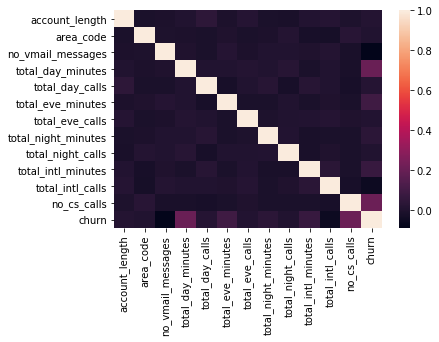

In [194]:
ax = sns.heatmap(df_2.corr())

## vamo ver a proporcao de churn pra no churn

In [195]:
df_2['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

## oloco, muito não churn pra poco churn, vamo faze um over ou undersampling ai pra equilibrar

------------------------------------
### undersampling:

In [196]:
df_2_churn = df_2[df_2['churn']==True]

# Select the rows in df_train dataframe where Target == 0
df_2_nochurn = df_2[df_2['churn']==False].sample(n=len(df_2_churn), random_state=235)

balanced_df = pd.concat([df_2_churn, df_2_nochurn], ignore_index=True, sort=False)

balanced_df

,state,account_length,area_code,international_plan,voice_mail_plan,no_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,no_cs_calls,churn
0,IN,65,415,no,no,0,129.1,137,228.5,83,208.8,111,12.7,6,4,True
1,NY,161,415,no,no,0,332.9,67,317.8,97,160.6,128,5.4,9,4,True
2,CO,77,408,no,no,0,62.4,89,169.9,121,209.6,64,5.7,6,5,True
3,AZ,12,408,no,no,0,249.6,118,252.4,119,280.2,90,11.8,3,1,True
4,MD,135,408,yes,yes,41,173.1,85,203.9,107,122.2,78,14.6,15,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,LA,87,415,no,no,0,228.7,90,163.0,99,154.1,90,11.8,3,1,False
962,NJ,106,415,no,no,0,207.9,91,172.0,109,191.8,143,14.4,7,4,False
963,AK,96,408,no,yes,29,150.0,91,159.4,75,228.1,55,8.5,3,1,False
964,TX,140,408,no,no,0,194.8,107,170.9,99,225.1,93,13.9,4,0,False


------------------------------------
### overersampling:

In [197]:
# y=df_2['churn']
# X=df_2.drop('churn',axis=1)


# X_dum=pd.get_dummies(X[categorical], drop_first=True)
# X = pd.concat([X, X_dum], axis=1)
# X.drop(categorical, axis=1, inplace = True)

# X_resampled, y_resampled = SMOTE(sampling_strategy={True:2000}).fit_resample(X, y)
# X_resampled = pd.DataFrame(X_resampled, columns=X.columns)



# balanced_df = X_resampled
# balanced_df['churn']=y_resampled


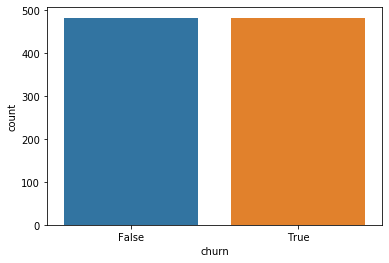

In [199]:
sns.countplot(balanced_df['churn'])


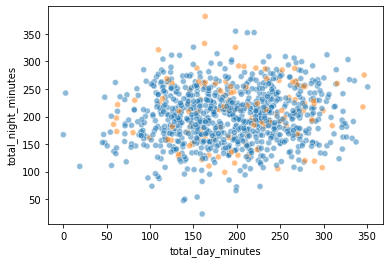

In [200]:
sns.scatterplot(balanced_df.total_day_minutes, balanced_df.total_night_minutes, y, alpha=.5, legend=False)

In [201]:
# from sklearn.manifold import TSNE

# X_embedded = TSNE(n_components=2).fit_transform(balanced_df.drop(columns = "churn"))
# X_embedded.shape


# from matplotlib.colors import ListedColormap
# plt.figure(figsize = (10,10))
# plt.scatter(X_embedded[:,0], X_embedded[:,1], 
#             c = balanced_df['Target'],
#             s = 1,
#             cmap = ListedColormap(['Red', 'Blue']),
#             linewidths=1)

# plt.title('Red: 0 , Blue: 1')

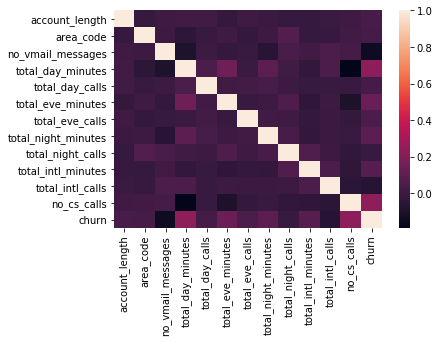

In [202]:
ax = sns.heatmap(balanced_df.corr())

## Agora vamos fazer a mesma coisa e treinar o modelo

In [203]:
df_label=balanced_df['churn']
df_features=balanced_df.drop('churn',axis=1)

In [204]:
df_features_categorical=df_features.select_dtypes(object)
df_features_numerical=df_features.select_dtypes([int,float])




In [205]:
categorical=[]
numerical=[]
label=['churn']
for i in df_features_categorical.columns:
    categorical.append(i)

for i in df_features_numerical.columns:
    numerical.append(i)

In [206]:
churn_x = df_2.drop(label, axis=1)
churn_y = df_2[label]

x_train, x_test, y_train, y_test = train_test_split(churn_x,churn_y, train_size=0.7,test_size=0.3,random_state=5050)
                                                                           

In [207]:
scaler = StandardScaler()
scaler = scaler.fit(x_train[numerical])

In [208]:
def pre_process_data(df,
                           numeric_columns,
                           categorical_columns,
                           fitted_scaler,
                           train_df_columns = None):
    ## create new df with selected columns
    df.columns = map(str.lower, df.columns)
    _df = df[set(numeric_columns + categorical_columns)].copy()
    
    ## scale the numeric columns with the pre-built scaler
    _df[numeric_columns] = fitted_scaler.transform(_df[numeric_columns])
         
    # First, make categorical text lowercase
    _df[categorical_columns] = _df[categorical_columns].apply(lambda x: x.str.lower())
    # Next, create one-hot-encoded variables, add to dataframe, drop old columns
    _df_dummies = pd.get_dummies(_df[categorical_columns], drop_first=True)
    _df = pd.concat([_df, _df_dummies], axis=1)
    _df.drop(categorical_columns, axis=1, inplace = True)

    if train_df_columns:
        _df = _df.reindex(columns=train_df_columns, fill_value=0)

    return _df

In [209]:
x_train_clean = pre_process_data(df = x_train,
                                            numeric_columns = numerical,
                                            categorical_columns = categorical,
                                            fitted_scaler = scaler)

x_test_clean = pre_process_data(df = x_test,
                                           numeric_columns = numerical,
                                           categorical_columns = categorical,
                                           fitted_scaler = scaler,
                                           train_df_columns = x_train_clean.columns.tolist())

# RANDOM DE NOVO

In [210]:
num_estimators = 100
min_samples = 4

rf = RandomForestClassifier(n_estimators=num_estimators,
                            min_samples_split=min_samples)
rf.fit(x_train_clean, y_train.values.ravel())


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [211]:
y_test_predicted = rf.predict(x_test_clean)

accuracy = metrics.accuracy_score(y_test, y_test_predicted)
auc_score = metrics.roc_auc_score(y_test, y_test_predicted)

print(accuracy)
print(auc_score)


0.928
0.7713570950883016


# LGB DE NOVO

In [212]:
lgb_train = lgb.Dataset(x_train_clean, y_train.values.ravel())
lgb_eval = lgb.Dataset(x_test_clean, y_test, reference=lgb_train)

In [213]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}





print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)


y_pred = gbm.predict(x_test_clean, num_iteration=gbm.best_iteration)
# eval

for i in range(0,len(y_pred)): 
    if ypred[i]>=.5:       # setting threshold to .5 
       ypred[i]=1 
    else: 
       ypred[i]=0  
    
accuracy = metrics.accuracy_score(y_test, ypred)
auc_score = metrics.roc_auc_score(y_test, ypred)

print(accuracy)
print(auc_score)

Starting training...
[1]	valid_0's l2: 0.115905	valid_0's l1: 0.240731
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 0.110214	valid_0's l1: 0.234217
[3]	valid_0's l2: 0.104199	valid_0's l1: 0.227132
[4]	valid_0's l2: 0.0987145	valid_0's l1: 0.220552
[5]	valid_0's l2: 0.094676	valid_0's l1: 0.215272
[6]	valid_0's l2: 0.0914413	valid_0's l1: 0.211234
[7]	valid_0's l2: 0.0884928	valid_0's l1: 0.207397
[8]	valid_0's l2: 0.0845133	valid_0's l1: 0.202036
[9]	valid_0's l2: 0.0821256	valid_0's l1: 0.198507
[10]	valid_0's l2: 0.0797652	valid_0's l1: 0.194791
[11]	valid_0's l2: 0.077273	valid_0's l1: 0.191447
[12]	valid_0's l2: 0.0742758	valid_0's l1: 0.186874
[13]	valid_0's l2: 0.071742	valid_0's l1: 0.182955
[14]	valid_0's l2: 0.069176	valid_0's l1: 0.178751
[15]	valid_0's l2: 0.0668832	valid_0's l1: 0.174742
[16]	valid_0's l2: 0.0647287	valid_0's l1: 0.170731
[17]	valid_0's l2: 0.0628177	valid_0's l1: 0.167044
[18]	valid_0's l2: 0.0613737	valid_0's l1: 0.164017

# XGBOOST DE NOVO

In [214]:
# dtrain=xgb.DMatrix(x_train,label=y_train)
# dtest=xgb.DMatrix(x_test)

parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

num_round=50
# from datetime import datetime 
# start = datetime.now() 
model= XGBClassifier()
model.fit(x_train_clean, y_train.values.ravel())
# stop = datetime.now()

# execution_time_xgb = stop-start 
# execution_time_xgb

ypred=model.predict(x_test_clean) 
ypred


for i in range(0,len(y_pred)): 
    if ypred[i]>=.5:       # setting threshold to .5 
       ypred[i]=1 
    else: 
       ypred[i]=0  
    

accuracy_xgb = metrics.accuracy_score(y_test,ypred) 
auc_score = metrics.roc_auc_score(y_test, ypred)
print(accuracy_xgb)
print(auc_score)

0.951
0.8736655685730563


## no random nao funcionou muito, mas nos outros a accuracy aumentou legal

## vamo fazer com o arquivo de teste agora

In [167]:
test_df=pd.read_csv('churnTest.csv')
test_df.columns = map(str.lower, test_df.columns)

In [168]:
test_df.replace(np.nan,0, inplace=True)
# test_df.dropna(inplace=True)

In [169]:
test_df.drop(['phone_no','total_day_charge','total_eve_charge','total_night_charge','total_night_charge','total_intl_charge'],axis=1,inplace=True)

In [170]:
df_features_categorical=test_df.select_dtypes(object)
df_features_numerical=test_df.select_dtypes([int,float])




In [171]:
categorical=[]
numerical=[]
label=['churn']
for i in df_features_categorical.columns:
    categorical.append(i)

for i in df_features_numerical.columns:
    numerical.append(i)

In [172]:
scaler = StandardScaler()
scaler = scaler.fit(df_features_numerical[numerical])

In [173]:
def pre_process_data_test(df,
                           numeric_columns,
                           categorical_columns,
                           fitted_scaler,
                           train_df_columns = None):
    ## create new df with selected columns
    df.columns = map(str.lower, df.columns)
    _df = df[set(numeric_columns + categorical_columns)].copy()
    
    ## scale the numeric columns with the pre-built scaler
    _df[numeric_columns] = fitted_scaler.transform(_df[numeric_columns])
         
    # First, make categorical text lowercase
    _df[categorical_columns] = _df[categorical_columns].apply(lambda x: x.str.lower())
    # Next, create one-hot-encoded variables, add to dataframe, drop old columns
    _df_dummies = pd.get_dummies(_df[categorical_columns], drop_first=True)
    _df = pd.concat([_df, _df_dummies], axis=1)
    _df.drop(categorical_columns, axis=1, inplace = True)

    if train_df_columns:
        _df = _df.reindex(columns=train_df_columns, fill_value=0)

    return _df

In [80]:
x_test_clean = pre_process_data(df = test_df,
                                           numeric_columns = numerical,
                                           categorical_columns = categorical,
                                           fitted_scaler = scaler)

In [81]:
x_test_clean.shape

(425, 15)

## Randomzao

In [82]:
x_test_clean.isnull().sum()

international_plan     5
total_night_calls      0
account_length         0
state                  0
total_intl_calls       0
total_eve_minutes      0
total_day_minutes      0
no_vmail_messages      0
total_night_minutes    0
total_day_calls        0
area_code              0
voice_mail_plan        4
total_intl_minutes     0
no_cs_calls            0
total_eve_calls        0
dtype: int64

In [83]:
y_test_predicted = rf.predict(x_test_clean)

ValueError: could not convert string to float: ' no'

In [87]:
y_test_predicted

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False,

In [91]:
test_df['Churn'] = y_test_predicted

sub = test_df[['Churn']].copy()
sub

sub.reset_index(inplace=True, drop=True)
sub = sub.replace(False, 'FALSE')
sub = sub.replace(True, 'TRUE')
sub.index += 1 


sub.to_csv('submission_rdm.csv', index=True, index_label='Id')

!kaggle competitions submit -c churn-analytics-bda -f submission_rdm.csv -m "Churning"

100%|██████████████████████████████████████| 4.03k/4.03k [00:03<00:00, 1.28kB/s]
Successfully submitted to Telecom Churn Analytics 

## XGBOOST 

In [133]:
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

num_round=50
# from datetime import datetime 
# start = datetime.now() 
#model= XGBClassifier()

# stop = datetime.now()

# execution_time_xgb = stop-start 
# execution_time_xgb

ypred=model.predict(x_test_clean) 
ypred


for i in range(0,425): 
    if ypred[i]>=.5:       # setting threshold to .5 
       ypred[i]=1 
    else: 
       ypred[i]=0  
    



In [134]:
ypred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False,

In [136]:
test_df['Churn'] = ypred

In [137]:
test_df.shape

(425, 16)

In [138]:
ypred.size

425

In [139]:
sub = test_df[['Churn']].copy()
sub

,Churn
0,False
1,False
2,False
3,False
4,False
...,...
420,False
421,True
422,False
423,False


In [140]:
sub.reset_index(inplace=True, drop=True)
sub = sub.replace(False, 'FALSE')
sub = sub.replace(True, 'TRUE')
sub.index += 1 
sub.head()

,Churn
1,FALSE
2,FALSE
3,FALSE
4,FALSE
5,FALSE


In [141]:
sub.to_csv('submission.csv', index=True, index_label='Id')

In [142]:
sub

,Churn
1,FALSE
2,FALSE
3,FALSE
4,FALSE
5,FALSE
...,...
421,FALSE
422,TRUE
423,FALSE
424,FALSE


In [143]:
!kaggle competitions submit -c churn-analytics-bda -f submission.csv -m "Churning"

100%|████████████████████████████████████████| 4.02k/4.02k [00:04<00:00, 838B/s]
Successfully submitted to Telecom Churn Analytics 